In [1]:
import os
import random 
import itertools
import cv2
import PIL
import imutils
from imutils import paths
from PIL import ImageFilter

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras import callbacks
from keras import Sequential
from keras import backend as K
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import UpSampling2D
from keras.layers import BatchNormalization


from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
from functions import pil_image

In [3]:
optimizers.sgd_experimental

<module 'keras.optimizer_experimental.sgd' from 'c:\\Users\\katli\\anaconda3\\lib\\site-packages\\keras\\optimizer_experimental\\sgd.py'>

# Augumentation Steps | 
1) Noise
2) Blur
3) Perpective Rotation
4) Shading
5) Variable Character Spacing
6) Variable Aspect Ratio

In [4]:
def noise_image(pil_im):
    
    img_array = np.asarray(pil_im)
    mean = 0.1    # some constant
    std = 5    # standard deviation
    
    noisy_img = img_array + np.random.normal(mean , std  , img_array.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255)
    noise_img = PIL.Image.fromarray(np.uint8(noisy_img_clipped)) # output
    plt.imshow((noisy_img_clipped ).astype(np.uint8)) # showing the image
    noise_img=noise_img.resize((105,105))
    return noise_img

In [5]:
def blur_image(pil_im):
    
    blur_img = pil_im.filter(ImageFilter.GaussianBlur(radius=3)) # ouput
    blur_img=blur_img.resize((105,105))
    plt.imshow(blur_img) 
    
    return blur_img

In [6]:
def affine_rotation(img):
    
    rows, columns = img.shape

    point1 = np.float32([[10, 10], [30, 10], [10, 30]])
    point2 = np.float32([[20, 15], [40, 10], [20, 40]])

    A = cv2.getAffineTransform(point1, point2)

    output = cv2.warpAffine(img, A, (columns, rows))
    affine_img = PIL.Image.fromarray(np.uint8(output)) # affine rotated output
    plt.imshow(output)
    affine_img=affine_img.resize((105,105))
    return affine_img
   

In [7]:
def gradient_fill(image):
    #image=cv2.imread(img_path,0)
    laplacian = cv2.Laplacian(image,cv2.CV_64F)
    laplacian = cv2.resize(laplacian, (105, 105))
    return laplacian

## Preparing Dataset

In [8]:
data_path = "font_patch/"
data=[]
labels=[]
imagePaths = sorted(list(paths.list_images(data_path)))
random.seed(42)
random.shuffle(imagePaths)

In [9]:
def conv_label(label):
    if label == 'Lato':
        return 0
    elif label == 'Raleway':
        return 1
    elif label == 'Roboto':
        return 2
    elif label == 'Sansation':
        return 3
    elif label == 'Walkway':
        return 4

In [10]:
augument=["blur","noise","affine","gradient"]
a=itertools.combinations(augument, 4)

for i in list(a): 
    print(list(i))

['blur', 'noise', 'affine', 'gradient']


In [10]:
def pil_image(img_path):
    pil_im =PIL.Image.open(img_path).convert('L')
    pil_im=pil_im.resize((105,105))
    #imshow(np.asarray(pil_im))
    return pil_im



1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2


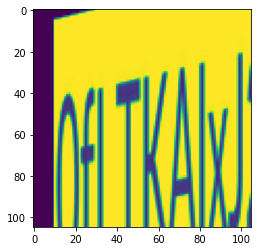

In [11]:
counter=0
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    label = conv_label(label)
    pil_img = pil_image(imagePath)
    #imshow(pil_img)
    
    # Adding original image
    org_img = img_to_array(pil_img)
    #print(org_img.shape)
    data.append(org_img)
    labels.append(label)
    
    augument=["noise","blur","affine","gradient"]
    for l in range(0,len(augument)):
    
        a=itertools.combinations(augument, l+1)

        for i in list(a): 
            combinations=list(i)
            print(len(combinations))
            temp_img = pil_img
            for j in combinations:
            
                if j == 'noise':
                    # Adding Noise image
                    temp_img = noise_image(temp_img)
                    
                elif j == 'blur':
                    # Adding Blur image
                    temp_img = blur_image(temp_img)
                    #imshow(blur_img)
                    
    
                elif j == 'affine':
                    open_cv_affine = np.array(pil_img)
                    # Adding affine rotation image
                    temp_img = affine_rotation(open_cv_affine)

                elif j == 'gradient':
                    open_cv_gradient = np.array(pil_img)
                    # Adding gradient image
                    temp_img = gradient_fill(open_cv_gradient)
  
            temp_img = img_to_array(temp_img)
            data.append(temp_img)
            labels.append(label)

In [12]:
data = np.asarray(data, dtype="float") / 255.0
labels = np.array(labels)
print("Success")
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

Success


In [13]:
# convert the labels from integers to vectors
# trainY = tf.keras.utils.to_categorical(trainY, num_classes=5)
# testY = tf.keras.utils.to_categorical(testY, num_classes=5)

In [14]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)

In [16]:
K.set_image_data_format('channels_first')

In [15]:
def create_model():
    model=keras.Sequential()

    # Cu Layers 
    model.add(Conv2D(64, kernel_size=(48, 48), activation='relu',padding='same', input_shape=(105,105,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(24, 24), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2DTranspose(128, (24,24), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
    model.add(UpSampling2D(size=(2, 2)))

    model.add(Conv2DTranspose(64, (12,12), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
    model.add(UpSampling2D(size=(2, 2)))

    #Cs Layers
    model.add(Conv2D(256, kernel_size=(12, 12), activation='relu', padding='same'))

    model.add(Conv2D(256, kernel_size=(12, 12), activation='relu', padding='same'))

    model.add(Conv2D(256, kernel_size=(12, 12), activation='relu', padding='same'))

    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(4096,activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(2383,activation='relu'))

    model.add(Dense(5, activation='softmax'))

    return model

In [16]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)
BATCH_SIZE = 32 * strategy.num_replicas_in_sync

REPLICAS:  1


In [18]:

model1= create_model()

# batch_size = 32 * strategy.num_replicas_in_sync
# epochs = 50
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

ResourceExhaustedError: OOM when allocating tensor with shape[186624,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]

In [ ]:
early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min')

filepath="top_model.h5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [early_stopping,checkpoint]

In [ ]:
model.fit(trainX, trainY,shuffle=True,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(testX, testY),
          callbacks=callbacks_list)

In [ ]:
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
from keras.models import load_model
model = load_model('top_model.h5')

In [ ]:
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
img_path="sample.jpg"
pil_im =PIL.Image.open(img_path).convert('L')
pil_im=blur_img(pil_im)
org_img = img_to_array(pil_im)

In [ ]:
def rev_conv_label(label):
    if label == 0 :
        return 'Lato'
    elif label == 1:
        return 'Raleway'
    elif label == 2 :
        return 'Roboto'
    elif label == 3 :
        return 'Sansation'
    elif label == 4:
        return 'Walkway'

In [ ]:
data=[]
data.append(org_img)
data = np.asarray(data, dtype="float") / 255.0

In [ ]:
y = model.predict_classes(data)

In [ ]:
label = rev_conv_label(int(y[0]))
fig, ax = plt.subplots(1)
ax.imshow(pil_im, interpolation='nearest', cmap=cm.gray)
ax.text(5, 5, label , bbox={'facecolor': 'white', 'pad': 10})
plt.show()